# DATA PREPROCESSING

In [ ]:
#Upload your kaggle API, more on that: https://www.kaggle.com/docs/api
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
! pip install -q kaggle

In [ ]:
import os

!sudo mkdir -p /root/.kaggle

print(os.path.exists('/root/.kaggle'))
print(os.path.exists('kaggle.json'))

True
True


In [ ]:
# Define source and path
source_path = 'kaggle.json'
destination_path = '/root/.kaggle/kaggle.json'

# Move uploaded key file to location
os.rename(source_path, destination_path)

In [ ]:
# Set the correct permissions for the key file
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
#More on dataset: https://www.kaggle.com/datasets/rashikrahmanpritom/age-recognition-dataset
!kaggle datasets download -d rashikrahmanpritom/age-recognition-dataset

 73% 57.0M/77.6M [00:00<00:00, 66.2MB/s]
100% 77.6M/77.6M [00:01<00:00, 77.9MB/s]


In [ ]:
import os
import shutil
from os.path import join

#Define your folder
destination_folder = '/content/AgeRecognition'

os.makedirs(destination_folder, exist_ok=True)
source_file = '/content/age-recognition-dataset.zip'
shutil.move(source_file, destination_folder)

'/content/AgeRecognition/age-recognition-dataset.zip'

In [ ]:
MAIN_PATH = "/content/AgeRecognition"
os.chdir(MAIN_PATH)

!unzip "/content/AgeRecognition/age-recognition-dataset.zip"

os.remove("/content/AgeRecognition/age-recognition-dataset.zip")

/content/AgeRecognition/Dataset/25-30/25_1_3_20170119172106986.jpg


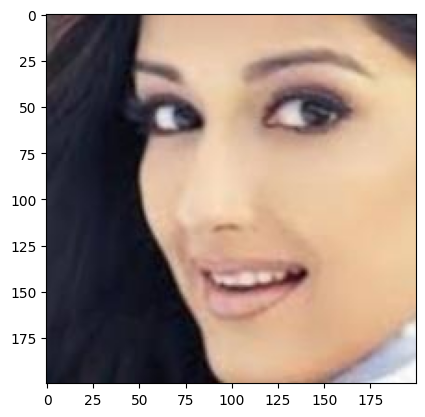

In [ ]:
import random
import cv2
import matplotlib.pyplot as plt


DATA_PATH = join(MAIN_PATH, "Dataset")


class_path = join(DATA_PATH, random.choice(os.listdir(DATA_PATH)))
image_path = join(class_path, random.choice(os.listdir(class_path)))

image = cv2.imread(image_path)
print(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
for path in os.listdir(DATA_PATH):
  class_path = join(DATA_PATH, path)

  print(path, len(os.listdir(class_path)))


60-98 2649
42-48 1439
6-20 2514
25-30 2495


In [ ]:
#A library that create an unique ID for each image
!pip install -q uuid

  Preparing metadata (setup.py) ... done


/content/AgeRecognition/Dataset/25-30/26_0_0_20170117200135805.jpg


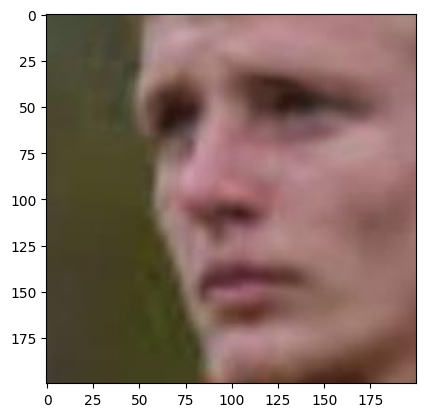

True

In [ ]:
import albumentations as A
from matplotlib import pyplot as plt
import cv2
import uuid



transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.Blur(blur_limit=(2, 6), p=0.5),
    A.RandomBrightnessContrast(contrast_limit=0.2, p=0.5),
    A.GaussNoise(var_limit=(10.0, 50.0), p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    # A.Normalize(),
])


random_image = join(class_path, random.choice(os.listdir(class_path)))
print(random_image)

image = cv2.imread(random_image)
augmented_image = transform(image=image)["image"]

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()



cv2.imwrite(join(MAIN_PATH, "ex.jpg"), augmented_image)

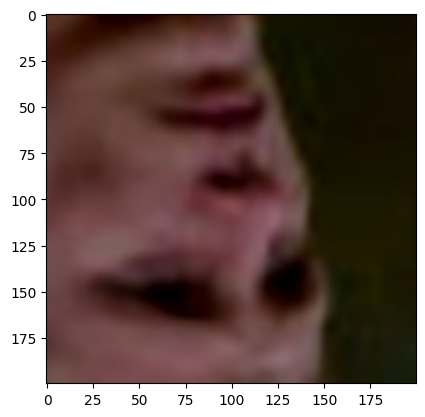

In [ ]:
ex = cv2.imread(join(MAIN_PATH, "ex.jpg"))
plt.imshow(cv2.cvtColor(ex, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
for class_path in os.listdir(DATA_PATH):
  class_path = join(DATA_PATH, class_path)
  for path in os.listdir(class_path):
    image_path = join(class_path, path)

    image = cv2.imread(image_path)
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    augmented_image = transform(image=image)["image"]

    new_image_path = join(class_path, str(uuid.uuid4())+".jpg")

    cv2.imwrite(new_image_path, augmented_image)
    if len(os.listdir(class_path)) >= 3000:
      break

/content/AgeRecognition/Dataset/25-30/25_0_1_20170117165420219.jpg


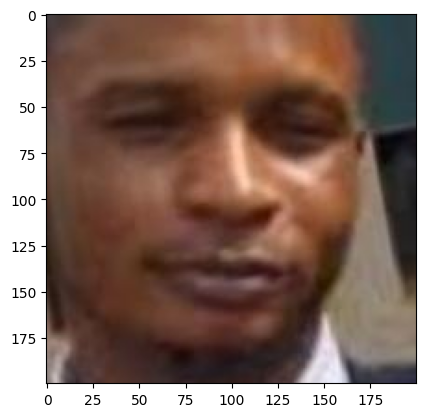

In [ ]:
image_path = join(class_path, random.choice(os.listdir(class_path)))

image = cv2.imread(image_path)
print(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# plt.imshow(image)
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32
image_size = (200, 200)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    )
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)



train_generator = train_datagen.flow_from_directory(
    DATA_PATH,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',  # Choose the appropriate class mode for your problem
    subset='training',
    shuffle=True
)

# Load and preprocess the validation dataset
val_generator = val_datagen.flow_from_directory(
    DATA_PATH,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',  # Choose the appropriate class mode for your problem
    subset='validation'
)


Found 9503 images belonging to 4 classes.
Found 2375 images belonging to 4 classes.


{'25-30': 0, '42-48': 1, '6-20': 2, '60-98': 3}


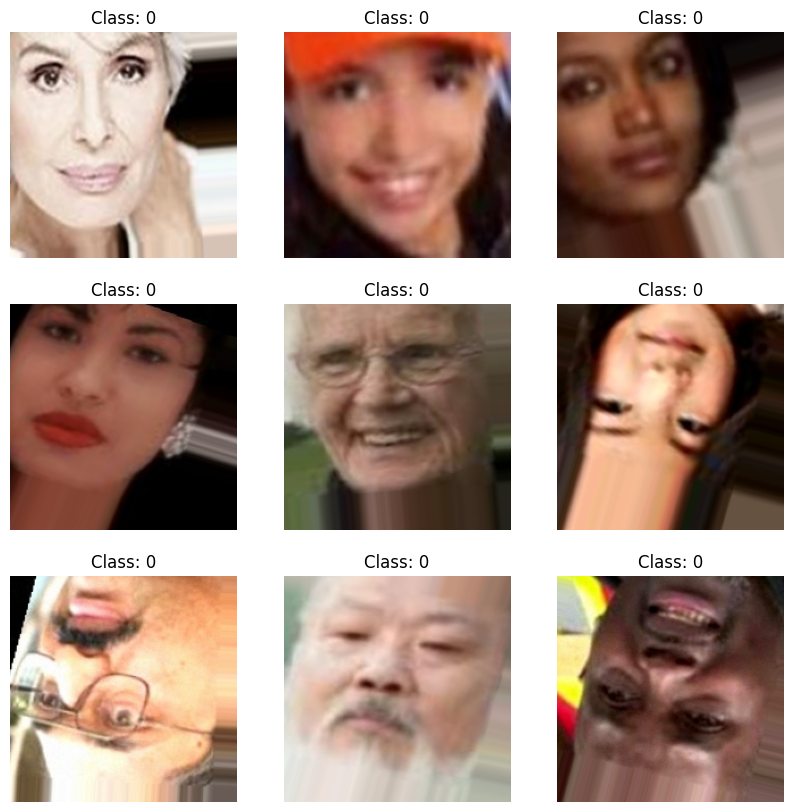

In [ ]:
sample_images, sample_labels = next(train_generator)

# Display a few sample images
print(train_generator.class_indices)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(sample_images[i])
    plt.title(f'Class: {sample_labels[i].argmax()}')
    plt.axis('off')
plt.show()


In [ ]:
# Example of setting class weights during model training
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(train_generator.classes), y=train_generator.classes)
print(class_weights)
class_weights = compute_class_weight('balanced', classes=np.unique(val_generator.classes), y=val_generator.classes)
print(class_weights)

[0.98989583 1.03158923 0.98989583 0.98989583]
[0.98958333 1.0326087  0.98958333 0.98958333]


# TRAINING MODEL

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Input, BatchNormalization, LeakyReLU, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy, BinaryCrossentropy, CategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy, Precision, Recall
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.initializers import GlorotUniform, HeUniform
from tensorflow.keras.applications import VGG16


def build_model():
  model = Sequential()

  base_model = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))
  for layer in base_model.layers[:-10]:
    layer.trainable = False


  model.add(base_model)
  model.add(GlobalAveragePooling2D())
  model.add(Flatten())

  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(8, activation='relu'))
  model.add(Dropout(0.5))


  model.add(Dense(4, activation='softmax'))

  return model


model = build_model()

initial_learning_rate = 0.00005
lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.9,
    staircase=True)


model.compile(
    optimizer = Adam(learning_rate=lr_schedule),
    loss = SparseCategoricalCrossentropy(),
    metrics = [SparseCategoricalAccuracy()],
    # class_weight = dict(enumerate(class_weights)),
)

model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 64)                32832     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 52

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='sparse_categorical_accuracy', mode='min')
early_stopping = EarlyStopping(monitor='sparse_categorical_accuracy', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=10,
    callbacks=[model_checkpoint, early_stopping]
    )

Epoch 1/10
 60/296 [=====>........................] - ETA: 1:56:19 - loss: 1.4346 - sparse_categorical_accuracy: 0.2583

In [ ]:
import random
import cv2
import matplotlib.pyplot as plt
import numpy as np

class_path = join(DATA_PATH, random.choice(os.listdir(DATA_PATH)))
image_path = join(class_path, random.choice(os.listdir(class_path)))

random_image = cv2.imread(image_path)
input_image = np.expand_dims(random_image, axis=0)
prediction = model.predict(input_image)
print(prediction[0], np.argmax(prediction, axis=1)+1)
print(class_path)
plt.imshow(cv2.cvtColor(random_image, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
model.save("AgeRecognition.h5")